In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each CSV into a DataFrame, specifying file paths for each iteration set
df_10_iters = pd.read_csv('metrics_results_maxIters_10.csv')
df_100_iters = pd.read_csv('metrics_results_maxIters_100.csv')
df_1000_iters = pd.read_csv('metrics_results_maxIters_1000.csv')
df_50_iters = pd.read_csv('metrics_results_maxIters_50.csv')
df_500_iters = pd.read_csv('metrics_results_maxIters_500.csv')
df_5000_iters = pd.read_csv('metrics_results_maxIters_5000.csv')

# Label each DataFrame for identification in combined plots
df_10_iters['Iterations'] = '10'
df_100_iters['Iterations'] = '100'
df_1000_iters['Iterations'] = '1000'
df_50_iters['Iterations'] = '50'
df_500_iters['Iterations'] = '500'
df_5000_iters['Iterations'] = '5000'
# Combine all dataframes for grouped visualizations
df_combined = pd.concat([df_10_iters, df_100_iters, df_1000_iters,df_50_iters, df_500_iters, df_5000_iters], ignore_index=True)
df_combined = df_combined.drop(columns=['Run'])

# Label the runs based on the Best Value column in df_combined
df_combined['Success'] = df_combined['Best Value'].apply(lambda x: 1 if x == 0 else 0)

# Display the combined DataFrame to check the structure
display(df_combined)


,Best Value,Best Iteration,Total Accepted Moves,Total Rejected Moves,Total Distance Traveled,Total Deviation from Optimum,Distinct Positions Visited,End-to-End Distance,Average Move Distance,Standard Deviation Objective,Acceptance Rate,Best Solution Improvements,Total Function Value Change,Exploration-Exploitation Ratio,Iterations,Success
0,1186.0,-1,9,2,9.242641,13650.0,8,0.000000,1.026960,38.241944,0.818182,0,409.0,1.255173,10,0
1,1370.0,10,6,5,5.414214,16506.0,4,2.828427,0.902369,46.836978,0.545455,3,154.0,1.654343,10,0
2,1808.0,10,8,3,6.414214,22032.0,7,4.123106,0.801777,106.845219,0.727273,6,329.0,1.102443,10,0
3,2017.0,-1,8,3,5.414214,22515.0,5,0.000000,0.676777,35.120101,0.727273,0,218.0,0.930568,10,0
4,2957.0,8,10,1,10.656854,34405.0,9,4.000000,1.065685,116.114435,0.909091,5,667.0,1.172254,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.0,1160,4502,499,4737.620992,442987.0,593,48.010416,1.052337,229.525479,0.900220,69,39069.0,1.168978,5000,1
236,0.0,3580,4633,368,4898.640328,621155.0,741,33.136083,1.057337,138.165261,0.926415,51,58787.0,1.141321,5000,1
237,0.0,412,4589,412,4875.829145,598567.0,687,57.280014,1.062504,294.765746,0.917616,84,47685.0,1.157895,5000,1
238,0.0,482,4538,463,4783.402738,508710.0,621,61.717096,1.054077,338.895468,0.907419,84,39283.0,1.161622,5000,1


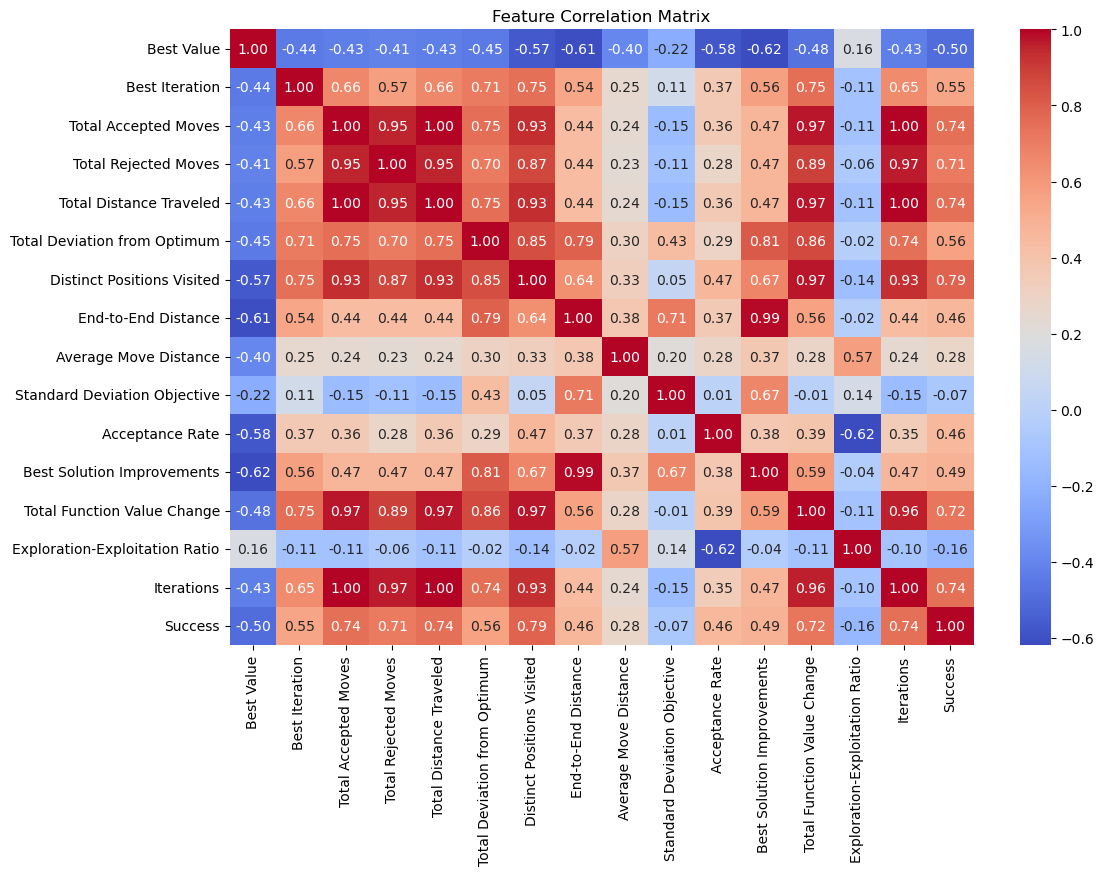

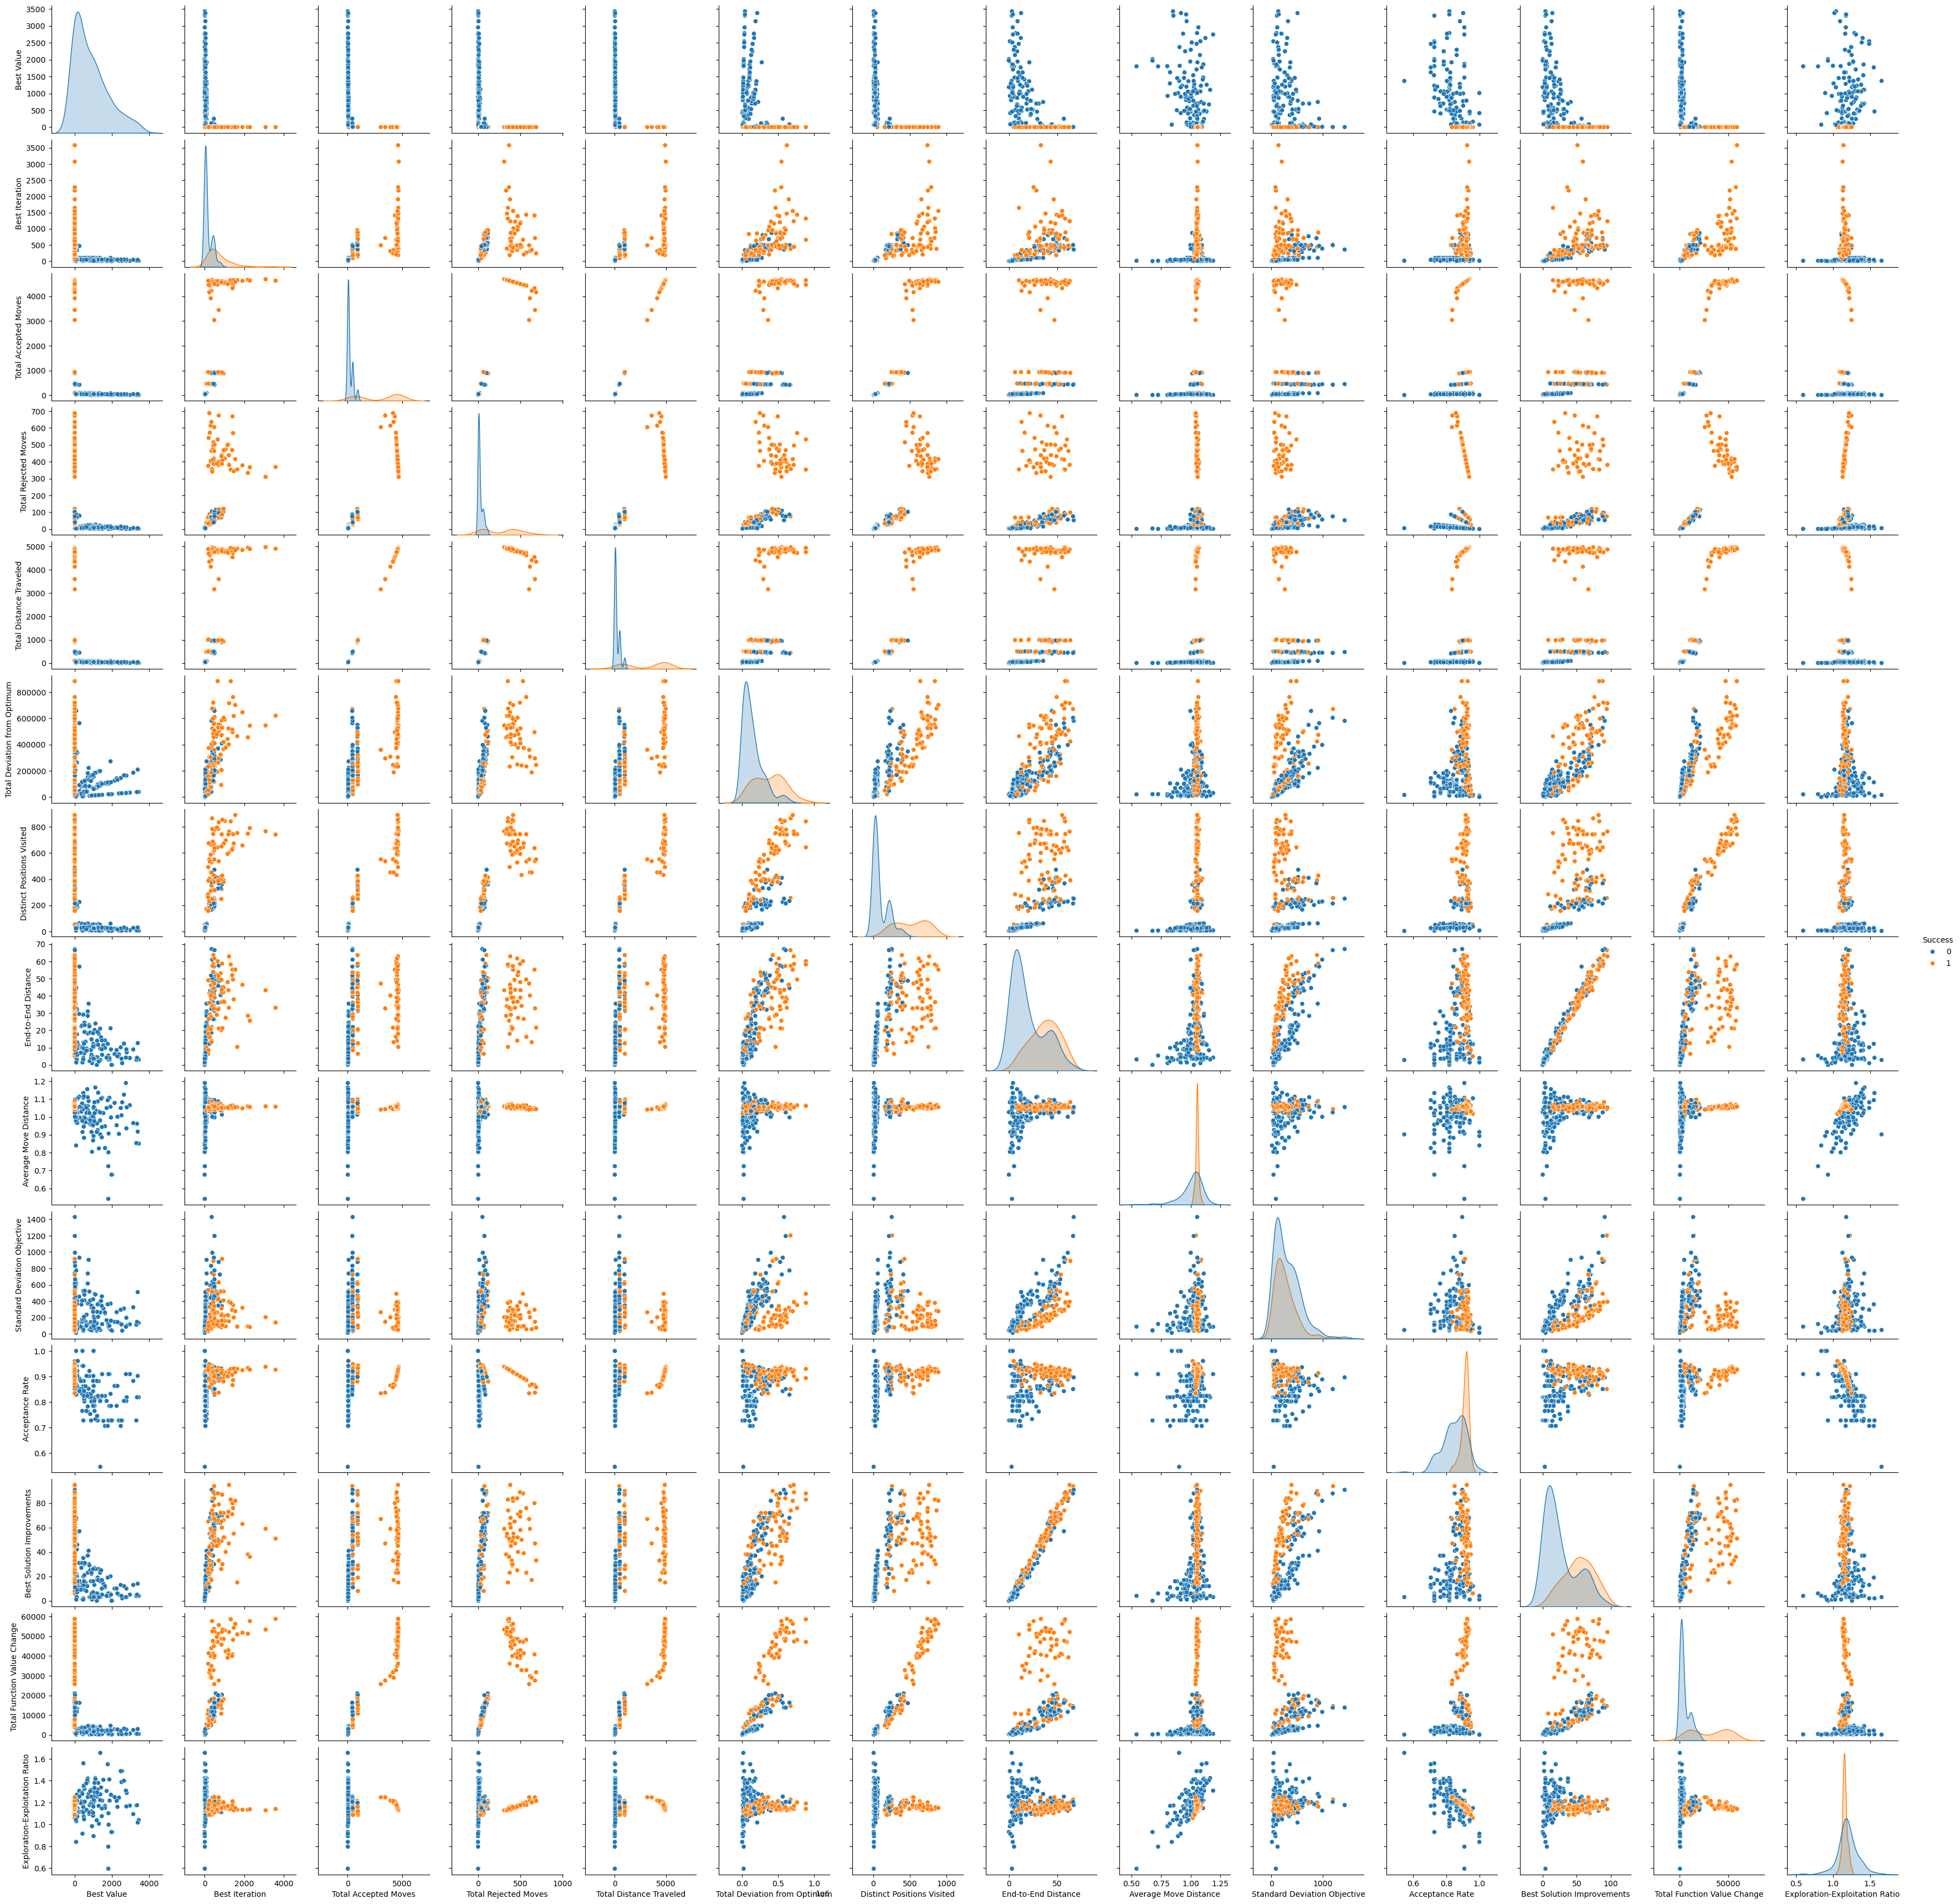

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the correlation between all features
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Pairplot with hue set to 'Success' to distinguish good and bad runs
sns.pairplot(df_combined, hue="Success")
plt.show()


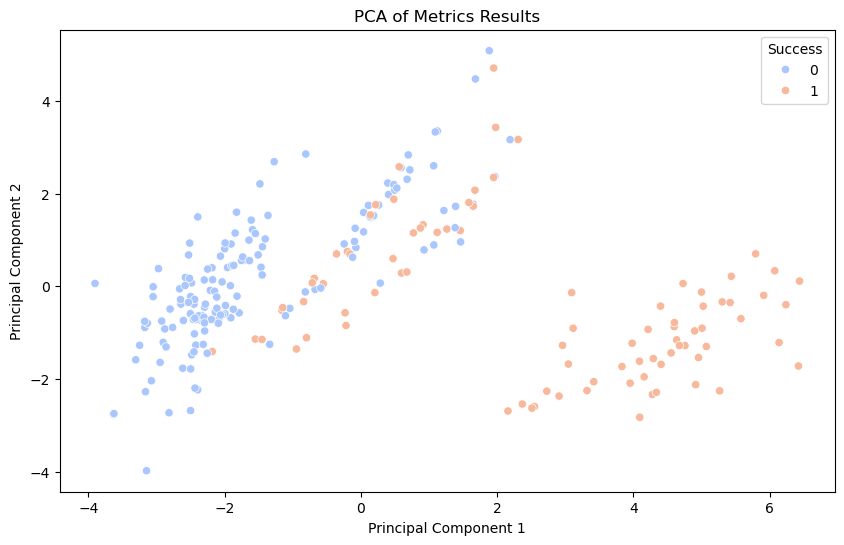

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.82      0.82      0.82        28

    accuracy                           0.86        72
   macro avg       0.85      0.85      0.85        72
weighted avg       0.86      0.86      0.86        72

Confusion Matrix:
 [[39  5]
 [ 5 23]]


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess the Data
# Separate features and target
X = df_combined.drop(columns=['Success', 'Best Value', 'Iterations'])  # Features for PCA
y = df_combined['Success']  # Target for classification

# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Success'] = y.reset_index(drop=True)  # Add success label for visualization

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Success', palette='coolwarm')
plt.title("PCA of Metrics Results")
plt.show()

# Step 3: Split Data for Classification
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Step 4: Train a Classification Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate
y_pred = model.predict(X_test)

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
